In [3]:
#loading a text file
import pandas as pd
import numpy as np


In [4]:
df = pd.read_csv("/home/kalyan/Downloads/Temp/cancer-wisconsin.data.txt")
df.head()

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
df['Bare_Nuclei']=pd.to_numeric(df['Bare_Nuclei'],errors='coerce')
df.isnull().sum()
df.head()

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.00,3,1,1,2
1,1002945,5,4,4,5,7,10.00,3,2,1,2
2,1015425,3,1,1,1,2,2.00,3,1,1,2
3,1016277,6,8,8,1,3,4.00,3,7,1,2
4,1017023,4,1,1,3,2,1.00,3,1,1,2


In [6]:
col_median = df['Bare_Nuclei'].median()
df['Bare_Nuclei'].fillna(col_median, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           699 non-null    int64  
 1   Clump_thickness              699 non-null    int64  
 2   Uniformity_Cell_Size         699 non-null    int64  
 3   Uniformity_Cell_Shape        699 non-null    int64  
 4   Marginal_Adhesion            699 non-null    int64  
 5   Single_Epithelial_Cell_Size  699 non-null    int64  
 6   Bare_Nuclei                  699 non-null    float64
 7   Bland_Chromatin              699 non-null    int64  
 8   Normal_Nucleoli              699 non-null    int64  
 9   Mitoses                      699 non-null    int64  
 10  Class                        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [7]:
for col in df.columns:
    col_median=df[col].median()
    df[col].fillna(col_median, inplace=True)     

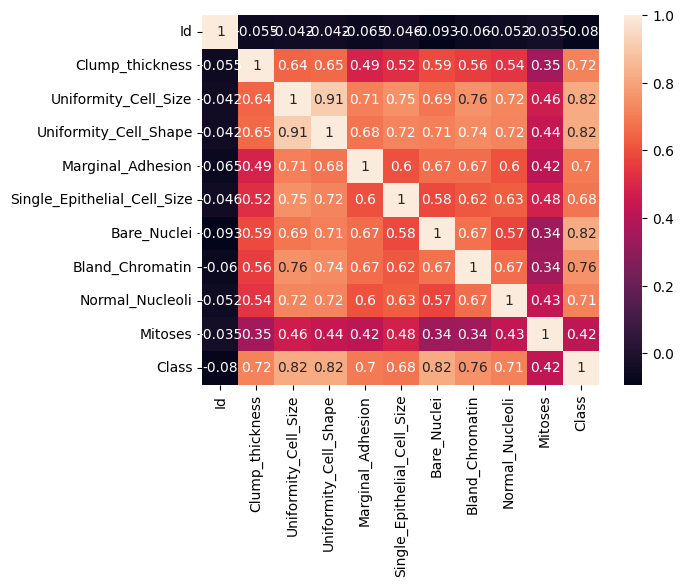

In [8]:
correlation=df.corr()
correlation['Class'].sort_values(ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns
a = sns.heatmap(correlation,annot=True)
plt.show()

In [9]:
#Scaling the data
from sklearn.preprocessing import MinMaxScaler
x = df.drop('Class',axis=1)
y = df['Class']
sclaer = MinMaxScaler()
features = sclaer.fit_transform(x)
col = x.columns
X = pd.DataFrame(features,columns=col)

In [10]:
#Splitting the data
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#Model Building
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test,y_pred)


0.9857142857142858

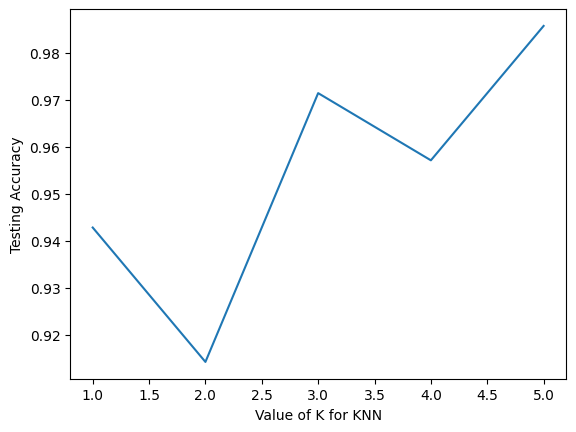

In [11]:
#plot accuracy vs k
k_range = range(1,6)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred))

plt.plot(k_range,scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

In [13]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:04<00:00,  6.78it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BernoulliNB,0.97,0.97,0.97,0.97,0.01
SVC,0.98,0.97,0.97,0.98,0.02
GaussianNB,0.96,0.97,0.97,0.96,0.01
PassiveAggressiveClassifier,0.97,0.97,0.97,0.97,0.01
NuSVC,0.96,0.96,0.96,0.96,0.02
SGDClassifier,0.97,0.96,0.96,0.97,0.01
KNeighborsClassifier,0.97,0.96,0.96,0.97,0.01
QuadraticDiscriminantAnalysis,0.95,0.96,0.96,0.95,0.02
LGBMClassifier,0.96,0.96,0.96,0.96,3.53
